In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from data_read import load_data_into_dataframe

#enable IPython to display matplolib graphs
%matplotlib inline

In [2]:
h_df = load_data_into_dataframe("halfhourly")
h_df.head()

/home/daniel/Bachelor/Bachelor_thesis/data_read.py:39: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(file) for file in dataset_files_csv), ignore_index=True)
/home/daniel/Bachelor/Bachelor_thesis/data_read.py:39: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(file) for file in dataset_files_csv), ignore_index=True)
/home/daniel/Bachelor/Bachelor_thesis/data_read.py:39: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(file) for file in dataset_files_csv), ignore_index=True)
/home/daniel/Bachelor/Bachelor_thesis/data_read.py:39: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(file) for file in dataset_files_csv), ignore_index=True)
/home/daniel/Bachelor/Bachelor_t

,LCLid,tstp,energy(kWh/hh)
0,MAC000239,2011-12-02 10:00:00.0000000,0.261
1,MAC000239,2011-12-02 10:30:00.0000000,0.138
2,MAC000239,2011-12-02 11:00:00.0000000,0.089
3,MAC000239,2011-12-02 11:30:00.0000000,0.1
4,MAC000239,2011-12-02 12:00:00.0000000,0.236


In [3]:
h_df.shape

(167817021, 3)

In [4]:
h_df.describe

<bound method NDFrame.describe of                LCLid                         tstp energy(kWh/hh)
0          MAC000239  2011-12-02 10:00:00.0000000         0.261 
1          MAC000239  2011-12-02 10:30:00.0000000         0.138 
2          MAC000239  2011-12-02 11:00:00.0000000         0.089 
3          MAC000239  2011-12-02 11:30:00.0000000           0.1 
4          MAC000239  2011-12-02 12:00:00.0000000         0.236 
...              ...                          ...            ...
167817016  MAC004303  2013-09-09 22:00:00.0000000         0.055 
167817017  MAC004303  2013-09-09 22:30:00.0000000         0.072 
167817018  MAC004303  2013-09-09 23:00:00.0000000         0.061 
167817019  MAC004303  2013-09-09 23:30:00.0000000         0.056 
167817020  MAC004303  2013-09-10 00:00:00.0000000         0.056 

[167817021 rows x 3 columns]>

In [5]:
h_df.dtypes

LCLid             object
tstp              object
energy(kWh/hh)    object
dtype: object

In [6]:
h_df["tstp"]

0            2011-12-02 10:00:00.0000000
1            2011-12-02 10:30:00.0000000
2            2011-12-02 11:00:00.0000000
3            2011-12-02 11:30:00.0000000
4            2011-12-02 12:00:00.0000000
                        ...             
167817016    2013-09-09 22:00:00.0000000
167817017    2013-09-09 22:30:00.0000000
167817018    2013-09-09 23:00:00.0000000
167817019    2013-09-09 23:30:00.0000000
167817020    2013-09-10 00:00:00.0000000
Name: tstp, Length: 167817021, dtype: object

In [7]:
h_df["tstp"] = pd.to_datetime(h_df["tstp"])

In [8]:
h_df.loc[0,"tstp"].year

2011

In [9]:
h_df = h_df.set_index("tstp")

In [10]:
h_df["energy(kWh/hh)"] = pd.to_numeric(h_df["energy(kWh/hh)"], downcast="float", errors="coerce")

In [ ]:
type(h_df.loc[0,"energy(kWh/hh)"])

In [11]:
affluenthh_filt = h_df["LCLid"] == "MAC000002"
aff_hh_df = h_df[affluenthh_filt]
#aff_hh_df = aff_hh_df.set_index("tstp")

ERROR! Session/line number was not unique in database. History logging moved to new session 260


In [12]:
aff_hh_df.head()

,LCLid,energy(kWh/hh)
tstp,,
2012-10-12 00:30:00,MAC000002,0.0
2012-10-12 01:00:00,MAC000002,0.0
2012-10-12 01:30:00,MAC000002,0.0
2012-10-12 02:00:00,MAC000002,0.0
2012-10-12 02:30:00,MAC000002,0.0


In [13]:
aff_hh_df.dtypes

LCLid              object
energy(kWh/hh)    float32
dtype: object

<AxesSubplot:xlabel='tstp', ylabel='energy(kWh/hh)'>

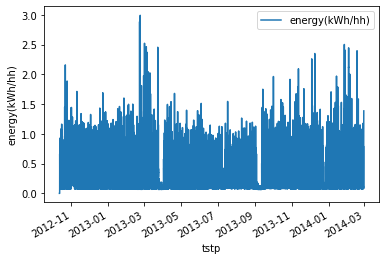

In [14]:
aff_hh_df.plot( y ="energy(kWh/hh)", ylabel = "energy(kWh/hh)" )

<AxesSubplot:title={'center':'1st jan 2013'}, xlabel='tstp', ylabel='energy(kWh/hh)'>

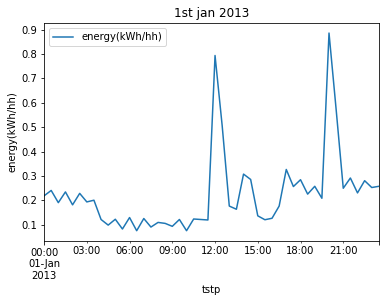

In [15]:
aff_hh_df.loc["2013-01-01"].plot( y ="energy(kWh/hh)", ylabel = "energy(kWh/hh)", title = "1st jan 2013" )

<AxesSubplot:title={'center':'1st august 2013'}, xlabel='tstp', ylabel='energy(kWh/hh)'>

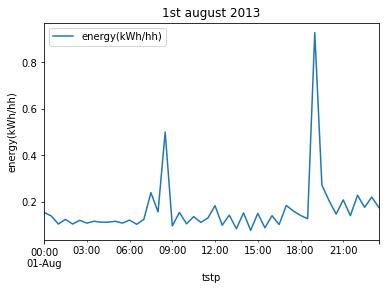

In [16]:
aff_hh_df.loc["2013-08-01"].plot( y ="energy(kWh/hh)", ylabel = "energy(kWh/hh)", title="1st august 2013")

<AxesSubplot:title={'center':'1st march 2013'}, xlabel='tstp', ylabel='energy(kWh/hh)'>

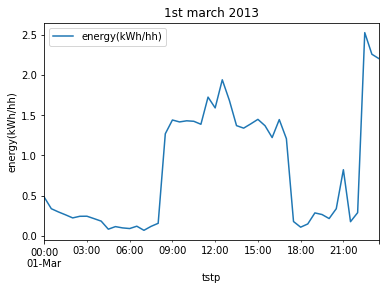

In [17]:
aff_hh_df.loc["2013-03-01"].plot( y ="energy(kWh/hh)", ylabel = "energy(kWh/hh)", title="1st march 2013" )

<AxesSubplot:title={'center':'jan 2013'}, xlabel='tstp', ylabel='energy(kWh/hh)'>

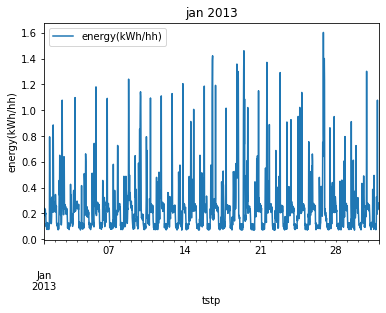

In [18]:
aff_hh_df.loc["2013-01-01":"2013-01-31"].plot( y ="energy(kWh/hh)", ylabel = "energy(kWh/hh)", title="jan 2013" )

<AxesSubplot:title={'center':'jan 2013'}, xlabel='tstp', ylabel='energy(kWh/hh)'>

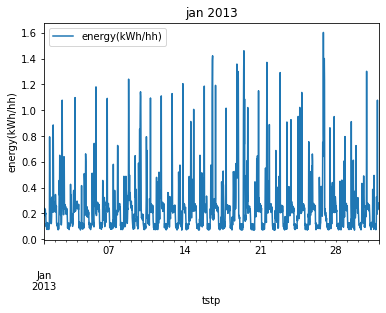

In [19]:
aff_hh_df.loc["2013-01-01":"2013-01-31"].plot( y ="energy(kWh/hh)", ylabel = "energy(kWh/hh)", title="jan 2013" )

<AxesSubplot:title={'center':'week of february'}, xlabel='tstp', ylabel='energy(kWh/hh)'>

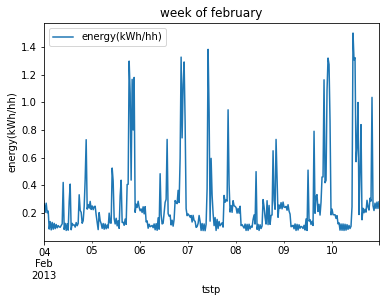

In [20]:
aff_hh_df.loc["2013-02-04":"2013-02-10"].plot( y ="energy(kWh/hh)", ylabel = "energy(kWh/hh)", title="week of february" )
            

In [21]:
weather_data = pd.read_csv("./data/weather_hourly_darksky.csv")
weather_data.head()

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy


In [34]:
weather_data["time"] = pd.to_datetime(weather_data["time"])
weather_data = weather_data.set_index("time")

In [35]:
weather_data.head()

,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
time,,,,,,,,,,,
2011-11-11 00:00:00,5.97,104,10.24,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
2011-11-11 01:00:00,4.88,99,9.76,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2011-11-11 02:00:00,3.70,98,9.46,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
2011-11-11 03:00:00,3.12,99,9.23,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
2011-11-11 04:00:00,1.85,111,9.26,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy


In [28]:
aff_h_df = aff_hh_df.resample("H").sum()

In [29]:
print(aff_h_df)

                     energy(kWh/hh)
tstp                               
2012-10-12 00:00:00           0.000
2012-10-12 01:00:00           0.000
2012-10-12 02:00:00           0.000
2012-10-12 03:00:00           0.000
2012-10-12 04:00:00           0.000
...                             ...
2014-02-27 20:00:00           2.259
2014-02-27 21:00:00           1.000
2014-02-27 22:00:00           1.766
2014-02-27 23:00:00           2.465
2014-02-28 00:00:00           1.387

[12097 rows x 1 columns]


ERROR! Session/line number was not unique in database. History logging moved to new session 267


In [32]:
print(weather_data_time_filter_aff)

False
ERROR! Session/line number was not unique in database. History logging moved to new session 268


In [33]:
aff_h_df.loc[:].index.to_series()

tstp
2012-10-12 00:00:00   2012-10-12 00:00:00
2012-10-12 01:00:00   2012-10-12 01:00:00
2012-10-12 02:00:00   2012-10-12 02:00:00
2012-10-12 03:00:00   2012-10-12 03:00:00
2012-10-12 04:00:00   2012-10-12 04:00:00
                              ...        
2014-02-27 20:00:00   2014-02-27 20:00:00
2014-02-27 21:00:00   2014-02-27 21:00:00
2014-02-27 22:00:00   2014-02-27 22:00:00
2014-02-27 23:00:00   2014-02-27 23:00:00
2014-02-28 00:00:00   2014-02-28 00:00:00
Freq: H, Name: tstp, Length: 12097, dtype: datetime64[ns]

In [38]:
weather_data_f = weather_data["2012-10-12 00:00:00":"2014-02-28 00:00:00"]
weather_data_f

,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
time,,,,,,,,,,,
2012-11-25 00:00:00,4.09,135,10.19,9.97,992.53,10.19,5.62,rain,partly-cloudy-night,0.99,Mostly Cloudy
2012-11-25 01:00:00,7.45,170,11.67,11.39,990.38,11.67,6.70,rain,partly-cloudy-night,0.98,Mostly Cloudy
2012-11-25 02:00:00,8.95,208,12.54,11.32,989.61,12.54,7.97,rain,wind,0.92,Breezy and Mostly Cloudy
2012-11-25 03:00:00,13.50,244,11.39,9.14,992.15,11.39,11.02,rain,wind,0.86,Breezy and Partly Cloudy
2012-11-25 04:00:00,13.50,248,10.26,7.66,994.81,10.26,11.31,rain,wind,0.84,Windy and Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...
2014-02-15 19:00:00,12.68,247,7.39,3.06,997.07,3.91,6.08,rain,partly-cloudy-night,0.74,Partly Cloudy
2014-02-15 20:00:00,13.78,249,6.56,2.76,998.15,3.03,5.61,rain,clear-night,0.77,Clear
2014-02-15 21:00:00,14.31,248,6.47,2.71,999.28,3.06,5.25,rain,clear-night,0.77,Clear


In [39]:
weather_data_f["energy(kWh/hh)"] = aff_h_df["energy(kWh/hh)"]

<AxesSubplot:xlabel='time'>

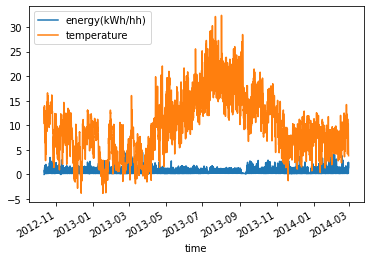

In [43]:
weather_data_f.plot(y=["energy(kWh/hh)", "temperature"])

<AxesSubplot:xlabel='energy(kWh/hh)', ylabel='temperature'>

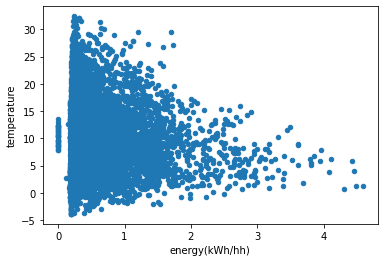

In [47]:
weather_data_f.plot.scatter(y="temperature", x="energy(kWh/hh)")